In [116]:
import pandas as pd
import numpy as np
# This library is for displaying things: graphs, bars, plots, etc.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [117]:
df = pd.read_csv('students.csv')

In [118]:
df

,السنة ميلادي,السنة,المنطقة الإدارية,إدارة التعليم,مكتب التعليم,السلطة,المرحلة,نوع المدرسة,جنس المدرسة,نظام الدراسة,...,جملة طلاب,جملة طلاب سعوديين,طلاب مستجدون,طلاب مستجدون سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,جملة خدم,جملة عمال
0,2014,1435,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,تعليم الكبار,بنين,النظام العام,...,9,9,3,3,0,0,0,0,0,0
1,2014,1435,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,تحفيظ,بنين,النظام العام,...,44,40,6,6,3,3,0,0,0,0
2,2014,1435,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,تربية خاصة,بنين,النظام العام,...,8,8,1,1,3,3,0,0,0,0
3,2014,1435,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الإبتدائية,نهاري,بنين,النظام العام,...,732,727,114,113,157,157,3,3,1,1
4,2014,1435,الباحة,إدارة التعليم بمحافظة المخواة,مكتب التعليم بالحجرة,حكومي,المرحلة الثانوية,تربية خاصة,بنين,النظام العام,...,7,7,0,0,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45531,2021,1442,نجران,الإدارة العامة للتعليم بمنطقة نجران,يدمه,حكومي,المرحلة الثانوية,نهاري,بنات,النظام العام,...,0,0,0,0,0,0,4,4,2,0
45532,2021,1442,نجران,الإدارة العامة للتعليم بمنطقة نجران,يدمه,حكومي,المرحلة الثانوية,نهاري,بنات,نظام المقررات,...,531,513,191,184,56,56,0,0,0,0
45533,2021,1442,نجران,الإدارة العامة للتعليم بمنطقة نجران,يدمه,حكومي,المرحلة المتوسطة,تحفيظ,بنات,النظام العام,...,67,61,24,20,2,2,1,1,1,0
45534,2021,1442,نجران,الإدارة العامة للتعليم بمنطقة نجران,يدمه,حكومي,المرحلة المتوسطة,نهاري,بنات,النظام العام,...,456,436,149,138,40,40,8,8,1,2


In [119]:
df.isna().sum()

السنة ميلادي          0
السنة                 0
المنطقة الإدارية      0
إدارة التعليم         0
مكتب التعليم          0
السلطة                0
المرحلة               0
نوع المدرسة           0
جنس المدرسة           0
نظام الدراسة          0
 فصول جملة            0
جملة طلاب             0
 جملة طلاب سعوديين    0
طلاب مستجدون          0
طلاب مستجدون سعودي    0
جملة معلمين           0
جملة معلمين سعودي     0
جملة  إداريون         0
جملة إداري سعودي      0
جملة خدم              0
جملة عمال             0
dtype: int64

In [142]:
df.notna()

,السنة ميلادي,السنة,المنطقة الإدارية,إدارة التعليم,مكتب التعليم,السلطة,المرحلة,نوع المدرسة,جنس المدرسة,نظام الدراسة,...,جملة طلاب,جملة طلاب سعوديين,طلاب مستجدون,طلاب مستجدون سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,جملة خدم,جملة عمال
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45531,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45532,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45533,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45534,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [120]:
dataframe = df[['السنة ميلادي','المنطقة الإدارية','نوع المدرسة','جملة طلاب']]

In [121]:
dataframe

,السنة ميلادي,المنطقة الإدارية,نوع المدرسة,جملة طلاب
0,2014,الباحة,تعليم الكبار,9
1,2014,الباحة,تحفيظ,44
2,2014,الباحة,تربية خاصة,8
3,2014,الباحة,نهاري,732
4,2014,الباحة,تربية خاصة,7
...,...,...,...,...
45531,2021,نجران,نهاري,0
45532,2021,نجران,نهاري,531
45533,2021,نجران,تحفيظ,67
45534,2021,نجران,نهاري,456


In [157]:
dataframe.notna()

,السنة ميلادي,المنطقة الإدارية,نوع المدرسة,جملة طلاب
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
45531,True,True,True,True
45532,True,True,True,True
45533,True,True,True,True
45534,True,True,True,True


In [122]:
dataframe.head(10)

,السنة ميلادي,المنطقة الإدارية,نوع المدرسة,جملة طلاب
0,2014,الباحة,تعليم الكبار,9
1,2014,الباحة,تحفيظ,44
2,2014,الباحة,تربية خاصة,8
3,2014,الباحة,نهاري,732
4,2014,الباحة,تربية خاصة,7
5,2014,الباحة,نهاري,489
6,2014,الباحة,نهاري,57
7,2014,الباحة,تحفيظ,38
8,2014,الباحة,تربية خاصة,7
9,2014,الباحة,نهاري,402


In [123]:
mask = dataframe['نوع المدرسة'] == 'تعليم الكبار '
adult_df = dataframe[mask]

In [124]:
adult_df

,السنة ميلادي,المنطقة الإدارية,نوع المدرسة,جملة طلاب
0,2014,الباحة,تعليم الكبار,9
11,2014,الباحة,تعليم الكبار,87
16,2014,الباحة,تعليم الكبار,12
20,2014,الباحة,تعليم الكبار,21
23,2014,الباحة,تعليم الكبار,21
...,...,...,...,...
45491,2021,نجران,تعليم الكبار,85
45493,2021,نجران,تعليم الكبار,8
45499,2021,نجران,تعليم الكبار,52
45514,2021,نجران,تعليم الكبار,708


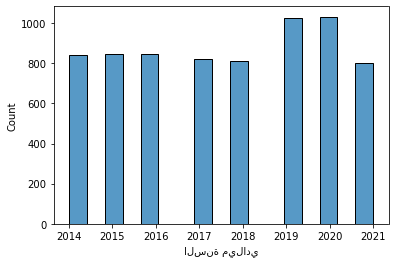

In [125]:
sns.histplot(adult_df['السنة ميلادي']);

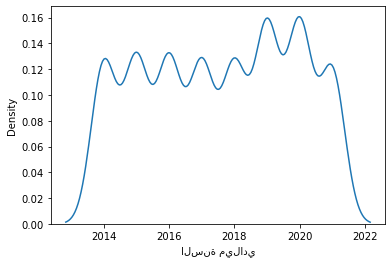

In [73]:
sns.kdeplot(adult_df['السنة ميلادي']);

In [87]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 0 to 45527
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   السنة ميلادي        7022 non-null   int64 
 1   السنة               7022 non-null   int64 
 2   المنطقة الإدارية    7022 non-null   object
 3   إدارة التعليم       7022 non-null   object
 4   مكتب التعليم        7022 non-null   object
 5   السلطة              7022 non-null   object
 6   المرحلة             7022 non-null   object
 7   نوع المدرسة         7022 non-null   object
 8   جنس المدرسة         7022 non-null   object
 9   نظام الدراسة        7022 non-null   object
 10   فصول جملة          7022 non-null   int64 
 11  جملة طلاب           7022 non-null   int64 
 12   جملة طلاب سعوديين  7022 non-null   int64 
 13  طلاب مستجدون        7022 non-null   int64 
 14  طلاب مستجدون سعودي  7022 non-null   int64 
 15  جملة معلمين         7022 non-null   int64 
 16  جملة معلمين سعودي   702

In [128]:
adult_df.shape[0]

7022

In [129]:
adult_rate = (adult_df.shape[0] / df.shape[0] * 100)

In [130]:
print (male_rate)

15.420765987350668


In [89]:
adult_df['السلطة'].value_counts()

حكومي             6570
أهلي               437
الهيئة الملكية      15
Name: السلطة, dtype: int64

In [132]:
adult_df['السنة ميلادي'].value_counts()

2020    1031
2019    1023
2015     848
2016     846
2014     840
2017     821
2018     812
2021     801
Name: السنة ميلادي, dtype: int64

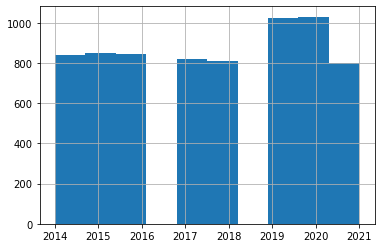

In [93]:
adult_df['السنة ميلادي'].hist()
plt.show()

In [138]:
adult_df.groupby('المنطقة الإدارية').count()['نوع المدرسة']#عدد مدارس تعليم الكبار في كل منطقة ادارية

المنطقة الإدارية
الباحة              212
الجوف               202
الحدود الشمالية     163
الرياض             1403
الشرقية             766
القصيم              563
المدينة المنورة     482
تبوك                280
جازان               495
حائل                308
عسير                667
مكة المكرمة        1293
نجران               188
Name: نوع المدرسة, dtype: int64

In [140]:
adult_df.groupby('المنطقة الإدارية').sum()['جملة طلاب']#عدد طلاب تعليم الكبار في كل منطقة تعليمية

المنطقة الإدارية
الباحة              12457
الجوف               20304
الحدود الشمالية     12334
الرياض             246984
الشرقية            134148
القصيم              55414
المدينة المنورة     75863
تبوك                48747
جازان              107341
حائل                24233
عسير                85228
مكة المكرمة        249860
نجران               29844
Name: جملة طلاب, dtype: int64

In [141]:
adult_df.groupby('السنة ميلادي').sum()['جملة طلاب']

السنة ميلادي
2014    173140
2015    165990
2016    158066
2017    139499
2018    128268
2019    117466
2020    118884
2021    101444
Name: جملة طلاب, dtype: int64

In [41]:
df.groupby('السنة ميلادي').count()['جملة طلاب']

السنة ميلادي
2014    5095
2015    5267
2016    5352
2017    5465
2018    5583
2019    6484
2020    6580
2021    5710
Name: جملة طلاب, dtype: int64

In [33]:
df.groupby('السنة ميلادي').sum()['جملة طلاب']

السنة ميلادي
2014    5595769
2015    5812486
2016    6002860
2017    6215587
2018    6238916
2019    6175125
2020    6338193
2021    6213366
Name: جملة طلاب, dtype: int64

In [26]:
df.notna()

,السنة ميلادي,السنة,المنطقة الإدارية,إدارة التعليم,مكتب التعليم,السلطة,المرحلة,نوع المدرسة,جنس المدرسة,نظام الدراسة,...,جملة طلاب,جملة طلاب سعوديين,طلاب مستجدون,طلاب مستجدون سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,جملة خدم,جملة عمال
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45531,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45532,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45533,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
45534,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [27]:
#df.notna().groupby('المرحلة')['المرحلة'].count()

المرحلة
True    45536
Name: المرحلة, dtype: int64

<AxesSubplot:>

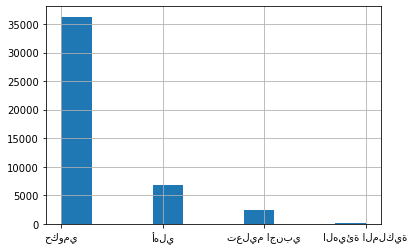

In [28]:
df['السلطة'].hist()

<AxesSubplot:>

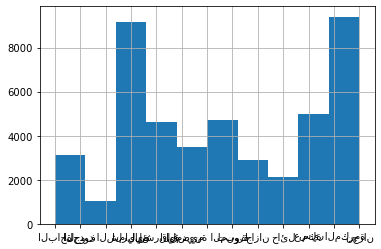

In [146]:
dataframe['المنطقة الإدارية'].hist()

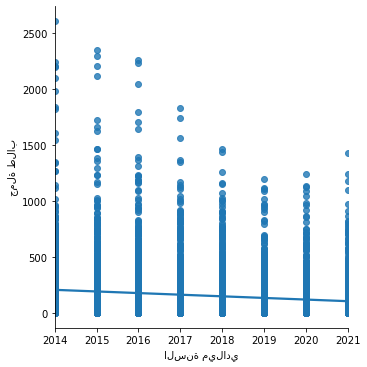

In [165]:
sns.lmplot(x ='السنة ميلادي', y ='جملة طلاب', data = adult_df,ci=None );

In [170]:
# import model and fit
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression  

# grab the x column and y column
#define the independent column
X1 = adult_df.x.values.reshape(-1, 1) 
#then the dependent column?
y1 = adult_df.y.values.reshape(-1, 1) 

#1 eate an object to Linear Regression model formula 
linreg_model = LinearRegression()

#2 tting the model == Train Model 
linreg_model.fit(X1, y1)

AttributeError: 'DataFrame' object has no attribute 'x'

In [171]:
round(linreg_model.score(X1, y1)*100) 

NameError: name 'linreg_model' is not defined